In [25]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

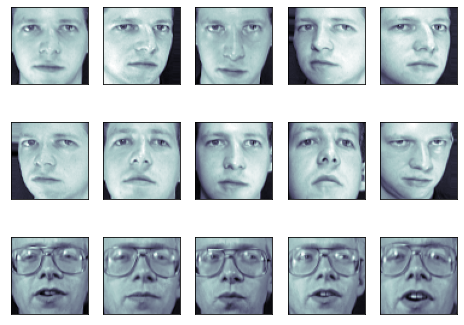

In [26]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target)
y_test

array([18, 14, 36, 16, 28, 19, 14, 25, 28, 18, 21, 25,  1, 25, 20, 37, 35,
       13,  1, 11, 17, 38,  3, 19, 36, 30,  8, 19, 37, 32,  3,  9, 22, 33,
       17,  5,  2, 39, 16, 11, 34, 11, 24, 11,  2,  1, 28, 35, 39,  7, 34,
       21,  7, 14, 21,  1, 25, 26, 26,  6, 23, 11,  9, 15, 17, 32, 27, 33,
       23,  8, 27,  7, 18, 38, 23, 33, 12, 12, 33, 31, 10, 17,  7,  8,  3,
       36,  1, 32, 19, 24, 38, 30,  9,  3, 31, 27,  8, 22, 13, 37])

Decomposistion Step


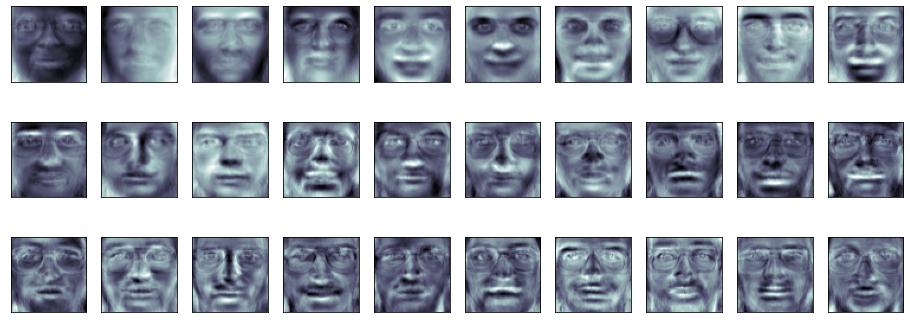

In [28]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=130, whiten=True)
pca.fit(X_train)
# plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)
fig = plt.figure(figsize=(16,6))
for i in range(30):
  ax = fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

In [30]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

(300, 130) (100, 130)


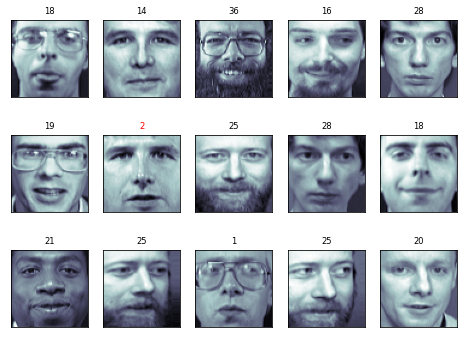

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import numpy as np

gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

# clf = svm.SVC(C=5, gamma=0.001)
# clf.fit(X_train_pca, y_train)

fig = plt.figure(figsize=(8,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape ),cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color= color)

In [37]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))
# print("Recall:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.77      0.91      0.83        11
           2       0.88      0.70      0.78        10

    accuracy                           0.89        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.90      0.89      0.89        38

Precision: 0.8947368421052632


Gaussian without PCA


In [33]:
nbf = GaussianNB()
nbf.fit(X_train, y_train)
y_pred = nbf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      1.00      0.75         3
           2       0.50      0.20      0.29         5
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         1
          11       0.60      1.00      0.75         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      0.25      0.40         4
          16       1.00      1.00      1.00         2
          17       0.50    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree without PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)
y_pred = dtf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
           7       0.33      1.00      0.50         2
           8       0.25      1.00      0.40         1
           9       0.67      0.50      0.57         4
          10       0.00      0.00      0.00         0
          11       1.00      0.33      0.50         3
          12       0.50      0.33      0.40         6
          13       0.40      0.67      0.50         3
          14       0.67      0.50      0.57         4
          15       0.67      0.67      0.67         3
          16       1.00      0.50      0.67         4
          17       0.50      1.00      0.67         2
          18       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

PipeLining

1) using Gaussian NB

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca',decomposition.PCA(n_components=130, whiten=True)),('gnb',GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         4
           7       0.33      1.00      0.50         2
           8       0.50      1.00      0.67         2
           9       1.00      0.33      0.50         9
          10       0.00      0.00      0.00         0
          11       1.00      0.25      0.40         4
          12       0.50      1.00      0.67         2
          13       0.60      1.00      0.75         3
          14       1.00      1.00      1.00         3
          15       0.33      1.00      0.50         1
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         4
          20       1.00      1.00      1.00         2
          21       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

Using Decision TRee


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=130, whiten=True)), ('dt', DecisionTreeClassifier())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           7       0.33      0.50      0.40         4
           8       0.00      0.00      0.00         2
           9       0.33      1.00      0.50         1
          10       0.00      0.00      0.00         1
          11       1.00      0.50      0.67         2
          12       0.25      1.00      0.40         1
          13       0.20      0.50      0.29         2
          14       1.00      0.75      0.86         4
          15       0.33      0.33      0.33         3
          16       0.50      1.00      0.67         1
          17       0.75      1.00      0.86         3
          18       0.00      0.00      0.00         2
          19       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

Using SVC


In [ ]:
from sklearn.svm import SVC
clf = Pipeline([('pca', decomposition.PCA(n_components=130, whiten=True)), ('svc', SVC(C=5, gamma=0.001))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         2
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       0.75      1.00      0.86         3
          13       0.80      1.00      0.89         4
          14       1.00      1.00      1.00         3
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         4
          20       1.00      0.67      0.80         3
          21       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Exercises

Ex1 done *above*

EX2

In [34]:
from sklearn import decomposition
from sklearn import datasets
data1 = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target)

pca = decomposition.PCA(n_components=4, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
# another part is below
# Ex3
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_pred,y_test))

(112, 4) (38, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.77      0.83        13
           2       0.70      0.88      0.78         8

    accuracy                           0.89        38
   macro avg       0.87      0.88      0.87        38
weighted avg       0.91      0.89      0.90        38



In [35]:
from sklearn.naive_bayes import GaussianNB
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('nb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.77      0.83        13
           2       0.70      0.88      0.78         8

    accuracy                           0.89        38
   macro avg       0.87      0.88      0.87        38
weighted avg       0.91      0.89      0.90        38



In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('dt', DecisionTreeClassifier())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.85      0.92        13
           2       0.80      1.00      0.89         8

    accuracy                           0.95        38
   macro avg       0.93      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



In [ ]:
from sklearn.svm import SVC
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('svc', SVC(C=5, gamma=0.001))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.55      0.71        22
           2       0.33      1.00      0.50         5

    accuracy                           0.74        38
   macro avg       0.78      0.85      0.74        38
weighted avg       0.91      0.74      0.76        38



Ex2 - remaining

In [ ]:
from sklearn import decomposition
from sklearn import datasets
import pandas as pd

# data1 = datasets.load_iris()
# df = pd.DataFrame(data1)
# df.drop(columns=data1.columns[0], axis=1,  inplace=True)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target)

# pca = decomposition.PCA(n_components=4, whiten=True)
# pca.fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)
# print(X_train_pca.shape,X_test_pca.shape)
# another part is below
# Ex3
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        15
           2       0.80      1.00      0.89        12

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38

